In [1]:
!mkdir -p ~/.kaggle/

In [2]:
!cp /content/kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:07<00:00, 244MB/s]
100% 1.06G/1.06G [00:07<00:00, 157MB/s]


In [4]:
import zipfile
!unzip /content/dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_dir="/content/dogs_vs_cats/train"
test_dir="/content/dogs_vs_cats/test"

In [7]:
train_gen=ImageDataGenerator(rescale=1/255.)
test_gen=ImageDataGenerator(rescale=1/255.)

In [8]:
train=train_gen.flow_from_directory(train_dir,target_size=(224,224),class_mode="binary",batch_size=32)
test=test_gen.flow_from_directory(test_dir,target_size=(224,224),class_mode="binary",batch_size=32)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [9]:
import tensorflow as tf

In [10]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,3,padding="valid",activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(64,3,padding="valid",activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,3,padding="valid",activation="relu"),
    tf.keras.layers.Conv2D(64,3,padding="valid",activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

In [11]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [12]:
model.fit(train,epochs=5,validation_data=test)

Epoch 1/5
625/625 [==============================] - 129s 184ms/step - loss: 0.6621 - accuracy: 0.6008 - val_loss: 0.5943 - val_accuracy: 0.6902
Epoch 2/5
625/625 [==============================] - 110s 176ms/step - loss: 0.5684 - accuracy: 0.7061 - val_loss: 0.5239 - val_accuracy: 0.7382
Epoch 3/5
625/625 [==============================] - 109s 174ms/step - loss: 0.4694 - accuracy: 0.7762 - val_loss: 0.4695 - val_accuracy: 0.7738
Epoch 4/5
625/625 [==============================] - 109s 174ms/step - loss: 0.3812 - accuracy: 0.8281 - val_loss: 0.4507 - val_accuracy: 0.8012
Epoch 5/5
625/625 [==============================] - 109s 175ms/step - loss: 0.2993 - accuracy: 0.8729 - val_loss: 0.5236 - val_accuracy: 0.7900


In [13]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,3,padding="valid",activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(64,3,padding="valid",activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,3,padding="valid",activation="relu"),
    tf.keras.layers.Conv2D(64,3,padding="valid",activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

In [14]:
model_1.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [15]:
model_1.fit(train,epochs=5,validation_data=test)

Epoch 1/5
625/625 [==============================] - 113s 179ms/step - loss: 0.6748 - accuracy: 0.5709 - val_loss: 0.6439 - val_accuracy: 0.6304
Epoch 2/5
625/625 [==============================] - 112s 180ms/step - loss: 0.6263 - accuracy: 0.6409 - val_loss: 0.6050 - val_accuracy: 0.6720
Epoch 3/5
625/625 [==============================] - 114s 182ms/step - loss: 0.5862 - accuracy: 0.6851 - val_loss: 0.5615 - val_accuracy: 0.7252
Epoch 4/5
625/625 [==============================] - 114s 182ms/step - loss: 0.5543 - accuracy: 0.7130 - val_loss: 0.5351 - val_accuracy: 0.7290
Epoch 5/5
625/625 [==============================] - 113s 181ms/step - loss: 0.5251 - accuracy: 0.7351 - val_loss: 0.5216 - val_accuracy: 0.7414


In [16]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,3,padding="valid",activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(64,3,padding="valid",activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,3,padding="valid",activation="relu"),
    tf.keras.layers.Conv2D(64,3,padding="valid",activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

In [17]:
model_2.compile(loss="binary_crossentropy",optimizer="adagrad",metrics=["accuracy"])

In [18]:
model_2.fit(train,epochs=5,validation_data=test)

Epoch 1/5
625/625 [==============================] - 114s 180ms/step - loss: 0.6864 - accuracy: 0.5498 - val_loss: 0.6835 - val_accuracy: 0.5380
Epoch 2/5
625/625 [==============================] - 112s 180ms/step - loss: 0.6676 - accuracy: 0.5962 - val_loss: 0.6499 - val_accuracy: 0.6312
Epoch 3/5
625/625 [==============================] - 113s 181ms/step - loss: 0.6444 - accuracy: 0.6184 - val_loss: 0.6294 - val_accuracy: 0.6446
Epoch 4/5
625/625 [==============================] - 114s 182ms/step - loss: 0.6270 - accuracy: 0.6352 - val_loss: 0.6154 - val_accuracy: 0.6534
Epoch 5/5
625/625 [==============================] - 114s 182ms/step - loss: 0.6117 - accuracy: 0.6540 - val_loss: 0.6015 - val_accuracy: 0.6780


In [19]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,3,padding="valid",activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(64,3,padding="valid",activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,3,padding="valid",activation="relu"),
    tf.keras.layers.Conv2D(64,3,padding="valid",activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

In [20]:
model_3.compile(loss="binary_crossentropy",optimizer="nadam",metrics=["accuracy"])

In [21]:
model_3.fit(train,epochs=5,validation_data=test)

Epoch 1/5
625/625 [==============================] - 120s 188ms/step - loss: 0.6222 - accuracy: 0.6411 - val_loss: 0.5299 - val_accuracy: 0.7256
Epoch 2/5
625/625 [==============================] - 109s 174ms/step - loss: 0.4873 - accuracy: 0.7649 - val_loss: 0.4449 - val_accuracy: 0.7884
Epoch 3/5
625/625 [==============================] - 119s 191ms/step - loss: 0.3953 - accuracy: 0.8248 - val_loss: 0.4613 - val_accuracy: 0.7986
Epoch 4/5
625/625 [==============================] - 110s 175ms/step - loss: 0.2925 - accuracy: 0.8776 - val_loss: 0.4760 - val_accuracy: 0.7984
Epoch 5/5
625/625 [==============================] - 111s 177ms/step - loss: 0.1861 - accuracy: 0.9258 - val_loss: 0.5558 - val_accuracy: 0.8002


In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
model_3.history.history["loss"]

[0.6222051382064819,
 0.48728999495506287,
 0.39530250430107117,
 0.29249367117881775,
 0.18613223731517792]

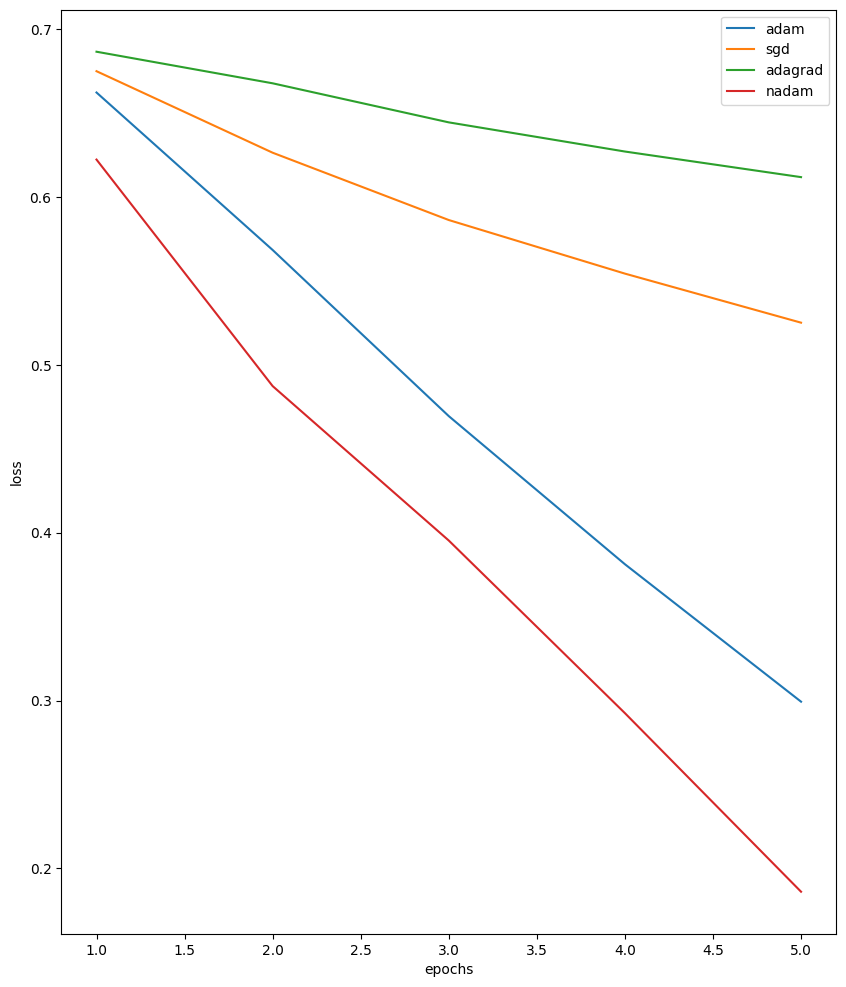

In [24]:
plt.figure(figsize=(10,12))
plt.plot(np.arange(1,6),model.history.history["loss"],label="adam")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(np.arange(1,6),model_1.history.history["loss"],label="sgd")
plt.plot(np.arange(1,6),model_2.history.history["loss"],label="adagrad")
plt.plot(np.arange(1,6),model_3.history.history["loss"],label="nadam")
plt.legend()
plt.show()